In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
from functions.qite_gci import *
from functions.qite_dme import *

# Plot config
plt.rcParams.update({
    'axes.labelsize': 16,
    'axes.titlesize': 16,
    'font.size': 16,
    'savefig.dpi': 75,
    'lines.linewidth': 2.0,
    'lines.markersize': 8,
    'legend.fontsize': 14,
    'legend.labelspacing': .3,
    'legend.columnspacing': .3,
    'legend.handletextpad': .1,
    'text.usetex': True,
    'font.family': "serif",
    'font.serif': "cm",
    'figure.figsize': [5, 3.5],
    'figure.autolayout': True
})

[Qibo 0.2.12|ERROR|2025-04-26 18:47:24]: The 'qibojit' backends' provider is not available. Check that a Python package named 'qibojit' is installed, and it is exposing valid Qibo backends.
[Qibo 0.2.12|ERROR|2025-04-26 18:47:24]: The 'qibojit' backends' provider is not available. Check that a Python package named 'qibojit' is installed, and it is exposing valid Qibo backends.
[Qibo 0.2.12|INFO|2025-04-26 18:47:24]: Using numpy backend on /CPU:0


In [ ]:
max_k = 6  # Maximum number of DB-QITE steps
max_M = 50  # Maximum number of DME Trotter steps
psi0 = np.sqrt(1/2) * np.array([[1], [1j]])  # Initial state

optimal_s_Mk = []  # Stores optimal step sizes s for each (M, k)

for M in range(1, max_M + 1):
    optimal_s_for_constant_M = []  # Optimal s values for fixed M and varying k
    for k in range(1, max_k + 1):
        # Define the cost function: final energy after applying GCI with current s list
        def dbqite(s):
            return GCI(QITE_dme_select_M(M), psi0, None, optimal_s_for_constant_M + [s]).execute_gci()[0][-1].real
        result = minimize(dbqite, 0.6, method='BFGS')  # Optimize next s
        optimal_s_for_constant_M = optimal_s_for_constant_M + [result.x[0]]
    optimal_s_Mk.append(optimal_s_for_constant_M)

optimal_s_Mk = np.asarray(optimal_s_Mk)  # Shape: (max_M, max_k)
optimal_s_kM = optimal_s_Mk.T  # Shape: (max_k, max_M), for plotting
np.save('optimal_s_Mk', optimal_s_Mk)  # Save result


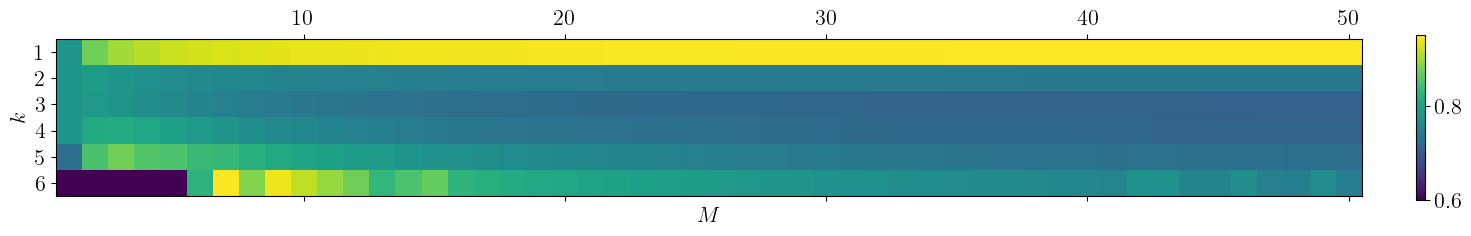

In [ ]:
# Create the plot with a specific figure size
fig, ax = plt.subplots(figsize=(15, 10))
cax = ax.matshow(optimal_s_kM)

# Adjust axis ticks
ax.set_xticks(np.arange(9, optimal_s_kM.shape[1], 10))  # Tick positions at 10, 20, 30, 40, 50
ax.set_yticks(np.arange(0, optimal_s_kM.shape[0]))  # Default y-axis ticks

# Set the labels for x axis to be 10, 20, 30, 40, 50
ax.set_xticklabels(np.arange(10, optimal_s_kM.shape[1] + 1, 10))  # Label them as 10, 20, 30, etc.
ax.set_yticklabels(np.arange(1, optimal_s_kM.shape[0] + 1))  # Y-axis starts from 1

# Display the plot
cbar = fig.colorbar(cax, ax=ax, orientation='vertical', fraction=0.006, pad=0.04)
ax.set_xlabel(r'$M$')
ax.set_ylabel(r'$k$')

plt.tight_layout()
plt.show()
